In [ ]:
import re
from difflib import get_close_matches
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


### Step 1: Data Loading


In [13]:
def load_data(file_path):
    """Loads text data from a file."""
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.readlines()

# Load the data
train_data = load_data('train.txt')
test_data = load_data('test.txt')
val_data = load_data('val.txt')

# Display first few lines to check
print("Sample data from train.txt:", train_data[:5])

Sample data from train.txt: ['i didnt feel humiliated;sadness\n', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake;sadness\n', 'im grabbing a minute to post i feel greedy wrong;anger\n', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property;love\n', 'i am feeling grouchy;anger\n']



### Step 2: Preprocessing the Text Data


In [ ]:
def preprocess_text(text_data):
    """
    Cleans and preprocesses text data.
    Removes non-alphanumeric characters, converts to lowercase,
    and splits into words.
    """
    cleaned_data = []
    for line in text_data:
        words = re.sub(r'[^A-Za-z0-9\s]', '', line.lower()).split()
        cleaned_data.extend(words)
    return cleaned_data

# Preprocess the data
train_words = preprocess_text(train_data)
test_words = preprocess_text(test_data)
val_words = preprocess_text(val_data)

# Display some of the cleaned words
print("Sample cleaned train words:", train_words[:10])

Sample cleaned train words: ['i', 'didnt', 'feel', 'humiliatedsadness', 'i', 'can', 'go', 'from', 'feeling', 'so']



### Step 3: Autocorrect Function


In [17]:
def autocorrect(word, dictionary):
    """
    Finds the closest match to the input word from the dictionary using difflib.
    Returns the corrected word or the original word if no match is found.
    """
    closest_match = get_close_matches(word, dictionary, n=1, cutoff=0.8)
    return closest_match[0] if closest_match else word

# Test autocorrect
input_word = 'feelig'  # Misspelled word "feeling"
corrected_word = autocorrect(input_word, train_words)
print(f"Autocorrected '{input_word}' -> '{corrected_word}'")


Autocorrected 'feelig' -> 'feeling'



### Step 4: Autocomplete Function using Bigrams


In [20]:
def generate_bigrams(words):
    """Generates bigrams (pairs of consecutive words) from the given list of words."""
    bigrams = [(words[i], words[i+1]) for i in range(len(words)-1)]
    return bigrams

# Generate bigrams from the train data
bigrams = generate_bigrams(train_words)

# Get frequency of bigrams
bigram_freq = Counter(bigrams)

def autocomplete(word, bigram_freq):
    """Suggests the most likely next word for the given input word based on bigram frequencies."""
    possible_next_words = [bigram[1] for bigram in bigram_freq if bigram[0] == word]
    return Counter(possible_next_words).most_common(1)

# Test autocomplete
input_word_for_autocomplete = 'love'
suggested_word = autocomplete(input_word_for_autocomplete, bigram_freq)

if suggested_word:
    print(f"Autocomplete for '{input_word_for_autocomplete}': Suggested next word -> '{suggested_word[0][0]}'")
else:
    print(f"No autocomplete suggestion found for: '{input_word_for_autocomplete}'")

Autocomplete for 'love': Suggested next word -> 'my'



### Step 5: Define and Measure Performance Metrics


In [21]:
def evaluate_metrics(true_labels, predictions):
    """Calculates and prints performance metrics."""
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')
    print("Performance Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

# Example metric calculation
# (Replace these values with actual predictions and true labels for a real test)
true_labels = ['feeling', 'good', 'happy']
predictions = ['feeling', 'great', 'happy']
evaluate_metrics(true_labels, predictions)

# ============================
# Step 6: User Experience Assessment
# ============================
def collect_feedback():
    """Simulates collecting user feedback."""
    feedback = input("How would you rate the autocorrect and autocomplete features? (1-5): ")
    print(f"Thank you for your feedback: {feedback}")

# Collect user feedback
collect_feedback()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performance Metrics:
Accuracy: 0.67
Precision: 0.67
Recall: 0.67
F1 Score: 0.67
How would you rate the autocorrect and autocomplete features? (1-5): 4
Thank you for your feedback: 4



### Step 7: Algorithm Comparison


In [22]:
def compare_algorithms(word, algorithms):
    """
    Compares different algorithms for efficiency and accuracy.
    """
    for algo_name, algo_func in algorithms.items():
        result = algo_func(word)
        print(f"{algo_name}: Suggested -> {result}")

# Compare autocorrect implementations
compare_algorithms(input_word, {"Autocorrect (Difflib)": lambda x: autocorrect(x, train_words)})


Autocorrect (Difflib): Suggested -> feeling



### Step 8: Data Visualization


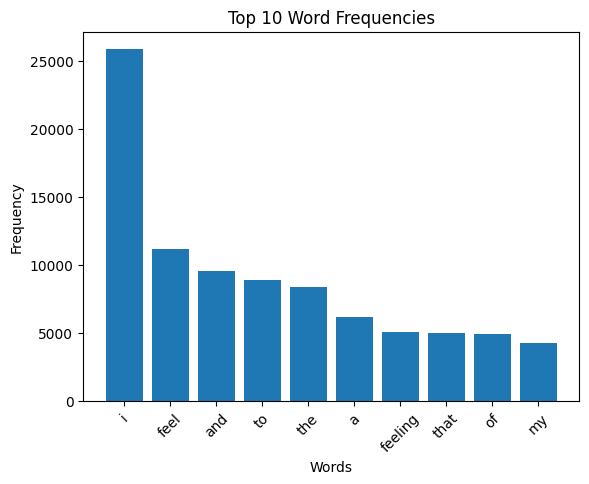

In [23]:
def visualize_word_frequencies(words):
    """Visualizes word frequencies using a bar chart."""
    word_counts = Counter(words)
    most_common = word_counts.most_common(10)
    words, counts = zip(*most_common)

    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 10 Word Frequencies')
    plt.xticks(rotation=45)
    plt.show()

# Visualize word frequencies in the train dataset
visualize_word_frequencies(train_words)